In [1]:
import numpy as np
import pickle as pkl 
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('seaborn')

In [9]:
import random

In [3]:
data = pkl.load(open('favorited_dict.p', 'rb'))
max_item, max_user = pkl.load(open('useful_stats.p', 'rb'))
visual_data = pkl.load(open('id_feature_dict_with_artist.p', 'rb'))

artist_dict = pkl.load(open('artist_dict.p', 'rb'))
item_to_artist = pkl.load(open('item_to_artist.p', 'rb'))
img_nfavs_dict = pkl.load(open('img_nfavs.p', 'rb'))


In [4]:
nfavs = list(img_nfavs_dict.values())

In [10]:
print('Mean favorites is {}, median favorites is {}'.format(np.mean(nfavs), np.median(nfavs)))

Mean favorites is 48.22110159413527, median favorites is 18.0


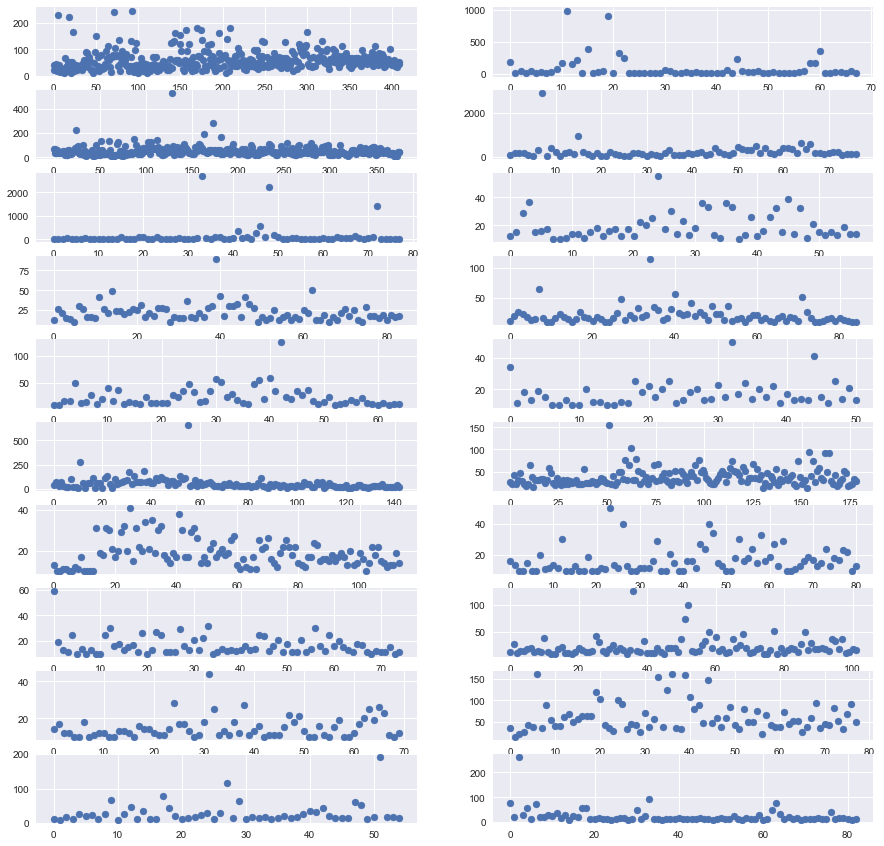

In [11]:
keys = list(artist_dict.keys())
keys = [key for key in keys if len(artist_dict[key])>50]
random.shuffle(keys)

fig, axes = plt.subplots(nrows=10, ncols=2, figsize = (15,15))
for i, user in enumerate(keys[0:20]):
    x = artist_dict[user]
    y = [img_nfavs_dict[img] for img in x]
    axes[i%10, int(i/10)].scatter(range(len(y)), y)
    

In [12]:
data

{1: [0,
  17,
  188,
  1095,
  2316,
  29633,
  29667,
  29676,
  29826,
  29878,
  30524,
  30784,
  30846,
  30856,
  31817,
  32063,
  36088],
 2: [0],
 3: [0, 38, 579, 8536, 11279, 29873, 31202, 38768, 46447],
 4: [0, 43, 77, 29719, 29926, 39684, 48485, 55732],
 5: [0, 68],
 6: [0,
  4,
  29,
  55,
  81,
  171,
  826,
  1043,
  1069,
  1355,
  1482,
  1763,
  1777,
  1790,
  1856,
  1874,
  1906,
  1910,
  1999,
  2082,
  2217,
  2217,
  2276,
  2295,
  2326,
  2339,
  2345,
  2511,
  2567,
  2643,
  2684,
  3188,
  3327,
  3367,
  3474,
  3660,
  3782,
  3801,
  3838,
  3984,
  4026,
  4087,
  4264,
  4496,
  4579,
  5051,
  5163,
  5244,
  6219,
  6248,
  6393,
  6780,
  7756,
  7764,
  8155,
  8337,
  8781,
  8790,
  9069,
  9193,
  9528,
  9768,
  10797,
  10954,
  11016,
  11663,
  12268,
  13276,
  13278,
  13486,
  14326,
  14338,
  14658,
  14819,
  14827,
  14857,
  14859,
  15228,
  15641,
  15649,
  15817,
  16276,
  16912,
  17396,
  17858,
  18068,
  18073,
  18237,
  

In [13]:
users

NameError: name 'users' is not defined

In [ ]:
import pickle as pkl
blah = pkl.load(open('full_data.p', 'rb'))

In [ ]:
it = list(blah.items())

In [ ]:
len(it[106][1])

In [ ]:
it[102][0]

In [ ]:
from scipy.stats.stats import pearsonr   
corrs =[]

In [ ]:
for feature in range(0, 4096):
    feat = visual_data[:,feature]
    x, y = pearsonr(feat, targets)
    corrs.append(x)

In [ ]:
import math
corrs = list(map(lambda x: 0 if math.isnan(x) else x, corrs ))

In [ ]:
armax = np.argmax(corrs)

In [ ]:
plt.scatter(visual_data[:, armax], targets)

In [ ]:
truncated_vd = visual_data[targets>1000]
truncated_nFavs = targets[targets>1000]

In [ ]:
corrs =[]
for feature in range(0, 4096):
    feat = truncated_vd[:,feature]
    x, y = pearsonr(feat, truncated_nFavs)
    corrs.append(x)

In [ ]:
corrs = list(map(lambda x: 0 if math.isnan(x) else x, corrs ))

In [ ]:
armax = np.argmax(corrs)
print ('Argmax is {}, with corr of {}'.format(armax, corrs[armax]))

In [ ]:
plt.scatter(truncated_vd[:, armax], truncated_nFavs)